# Investigating Pro-Cyclical Mortality in the UK during the 1991 and 2008 Financial Crises

Pro-Cyclical Mortality rates (a higher death rate during economic booms and a lower mortality rate during economic recessions) is a generally accepted fact. It is however not fully understood and seems initially counter-intuitive, since there are strong correlations between gdp growth and falling death rates, thus a dip in gdp would be expected to accompany an increase in mortality. Downturns also typically cause spikes in suicides and poverty levels, which would contribute to an increased mortality rate. 

There are many proposed explanations for Pro-cyclical mortality, a number of which are outlined below:

  * Reduced deaths on the road because people who become unemployed don't commute to work.
  * People who become unemployed have less stressful or healthier lives without work (e.g. they can spend more time looking after their health).
  * Reduced industrial output results in reduced pollution, making people generally healthier.
  * A study found that in the US, downturns were associated with improved elderly care and thus a decrease in elderly deaths. This was attributed to the fact that care homes struggle to employ enough staff in economic booms because the work is low paid and people seek better paid jobs when they are available. 

We wish to review UK death rate data between 1988 and 2018 to see this effect during the 1991 and 2008 financial crises, in particular to understand the impacts on different age groups.

This phenomenon is primarily associated with the unemployment rate. It is often reported in terms of mortality rate decreases with a 1% increase of the unemployment rate. As such, we will define the periods of the 1991 and 2008 crisis as the time over which the unemployment rates spiked during each crisis. The unemployment rates can be found [here](https://www.ons.gov.uk/employmentandlabourmarket/peoplenotinwork/unemployment/timeseries/mgsx/lms) and are shown below. The periods over which we define each crisis are highlighted.   

![title](https://github.com/rhart-rup/UK-Pro-Cyclical-Mortality/blob/master/figures/Unemployment%20definitions%20of%20crises.png?raw=true)

### Project Aims

  * Plot mortality rates of different **age groups** for men and women between 1988 and 2018 to identify drops or spikes in mortality rates that may be associated with the 1991 and 2008 financial crises, and may provide insights into pro-cyclical mortality. 
  * Track mortality rates for **groups of people** born in different decades (e.g. compare people born in 1978 - 1988 with people born in 1988 - 1998) to see how the financial crises impacted the mortality curves of each group as they age. 

### Set-up

We will start by importing the libraries we will use and changing the Pandas settings to display 400 rows and 50 columns of data. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

In [2]:
pd.options.display.max_rows = 400
pd.options.display.max_columns = 50

### Data Import

Next, we will import the [UK deaths per year data](https://www.ons.gov.uk/peoplepopulationandcommunity/birthsdeathsandmarriages/deaths/datasets/deathregistrationssummarytablesenglandandwalesdeathsbysingleyearofagetables) that has been downloaded locally. We are pulling the death data for each age between 0 and 89 in the years 1988 to 2018. The data is split between male and female data, we will keep these separate in our analysis because male and female death rates differ significantly. The row index indicates the age e.g. row 0 shows deaths per year of 0 year olds, row 1 shows deaths per year for 1 year olds etc.  

In [3]:
death_data = pd.read_excel('file://localhost/Users/rupe/OneDrive/Documents (Rupert)/Statistical Analysis/Jupyter Labs/Mortality Analysis/deathsyoauk2018.xls', 
                           sheet_name=['Table 1','Table 2'], skiprows=3, 
                           nrows=90, usecols='P:AT')
male_deaths = death_data['Table 1']
female_deaths = death_data['Table 2']

male_deaths.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,4110,3799,3614,3377,2954,2757,2644,2575,2575,2414,2315,2323,2136,2052,2050,2047,2033,2117,2078,2113,2123,2067,1915,2049,1912,1741,1646,1752,1654,1664,1570
1,281,275,273,267,218,223,207,177,192,191,190,190,156,143,160,133,150,143,146,154,144,127,129,143,134,135,142,119,111,98,100
2,168,182,175,152,135,158,125,115,120,115,120,118,102,91,97,87,79,90,85,104,70,73,77,81,74,74,72,67,64,58,48
3,135,140,126,132,105,108,88,100,85,81,84,84,69,62,58,77,70,66,53,70,60,42,61,46,42,45,56,53,51,47,43
4,96,102,100,85,101,91,85,62,87,78,71,67,63,62,67,59,46,40,44,51,45,34,39,40,46,44,30,49,34,47,44


We will now import the [UK mid-year population estimates data](https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/populationestimatesforukenglandandwalesscotlandandnorthernireland), we will import female and male populations seperately and will take data from 1988 to 2018. The data includes mid year population estimates for ages 0 to 89. Again, the row index indicates the age of the population in question, e.g. row 0 shows the population per year of 0 year olds. 

In [4]:
pop_data = pd.read_excel('file://localhost/Users/rupe/OneDrive/Documents (Rupert)/Statistical Analysis/Jupyter Labs/Mortality Analysis/UK population per age group.xlsx', 
sheet_name=['male','female'], skiprows=0, nrows=92, usecols='U:AY')
male_pop = pop_data['male']
female_pop = pop_data['female']

# Delete the first row from each table (contains sub-totals)
male_pop.drop(axis=0, index=0, inplace=True)
female_pop.drop(axis=0, index=0, inplace=True)

# Reset index after deleting rows
male_pop.reset_index(drop=True, inplace=True)
female_pop.reset_index(drop=True, inplace=True)

# Remove 'Mid-' from headers and convert to int (makes accessing 
# columns easier). 
male_pop.columns = [int(headers.replace('Mid-','')) 
                    for headers in male_pop.columns]
female_pop.columns = [int(headers.replace('Mid-','')) 
                      for headers in female_pop.columns]

female_pop.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,380086.0,376073.0,378369.0,387121,382842,369248,367833,356589,349698,357310,347609,343268,332621,324219,323174,330666,342853,349507,358637,369069,384803,382093,386673,390827,397837,385946,379305,378230,380820.0,371776.0,362931.0
1,368494.0,379596.0,375325.0,377580,386112,381687,368161,367245,355657,349698,356606,347991,342236,330909,325659,323410,330154,343394,349653,360360,369909,384984,381637,385277,393627,400531,389528,383105,382188.0,384222.0,375341.0
2,363800.0,368853.0,379461.0,375712,377531,385857,381464,368337,366616,355145,350257,357035,347883,340590,332885,326926,323443,331281,343541,350205,362111,370839,385016,382279,387710,396066,403832,393156,386860.0,385080.0,387630.0
3,363208.0,365241.0,370057.0,380941,375967,377770,385987,381288,368363,366026,354921,351429,356990,347071,342856,334329,327954,324614,331802,344051,350565,363802,371444,385930,384339,389601,398979,406959,396501.0,389445.0,388301.0
4,348955.0,363703.0,365840.0,371021,380610,375699,378116,386114,381302,368293,365466,355258,352338,356106,349327,344731,335655,329970,325333,332490,344260,350793,365104,372956,387600,386070,392256,401913,410067.0,399096.0,392101.0


### A Note on Data Cleaning

The population data had no population estimates from 2016 to 2018 and was missing values for people aged between 85 - 89 in the years 1981 to 1990. The data was cleaned directly in Excel before importing into Jupyter because this was a one off project, as a one off exercise Excel was the faster option. 

The population data for 2016 - 2018 was sourced from another government file that used the same population estimates but covered 2012 - 2018.  

The mid year population for the 85 - 89 year olds between 1981 - 1990 were estimated by finding, for each age (85 - 89), what the percentage drop in population was when they aged by one year. For example, the 84 year olds in 1979 become 85 year olds in 1980, and the drop in population from 84 to 85 years old was 11% in 1980 and was 9% in 1991. We then estimated the percentage drop over the missing data period (between 1981 - 1990) for 85 year olds to be the average of the 1980 and 1991 drops, in this example 9.5%. The 85 year olds data was then estimated as being a 9.5% drop of the 84 years old population on the previous year e.g. the 1981 data for 85 year olds is a 9.5% reduction of the 84 year old population in 1980. This was repeated for all ages 85 - 89 across 1981 - 1990.

The year on year population drop for each age shows a long term decline, this is why we used the average of the the drops in 1980 and 1991, because in reality the population drop would have slowly decreased from the 1980 value to the 1991 value (with statistical fluctuations).   

### Data Health Checks

We will perform basic health checks on the data to check for errors / missing data etc. Firstly we will check the data types of each column, this will help us spot unexpected data types such as strings where we expect ints. 

In [5]:
print('male_deaths: \n', male_deaths.dtypes, '\n\n',
      'female_deaths \n', female_deaths.dtypes, '\n\n',
      'male_pop \n', male_pop.dtypes, '\n\n',
      'female_pop \n', female_pop.dtypes, '\n\n',)

male_deaths: 
 1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
dtype: object 

 female_deaths 
 1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
2018    int64
dtype: object 

 male_pop 
 1988    float64
1989    float64
1990    float64
1991    

All columns are of the expected type (integer64) except the years in the population data where we have done some Excel data cleaning (1988 - 1990 and 2016 - 2018) which show up as float64. The floats shouldn't cause any issues. We have shown there are no unexpected data types like strings. 

Now we will check for null / missing values. 

In [6]:
def print_rows_with_null(data):
    """Print rows containing any null values"""
    null_rows = data[data.isna().any(axis=1)]
    if null_rows.empty:
        print('no null values')
    else: 
        print(null_rows)

print_rows_with_null(male_deaths)
print_rows_with_null(female_deaths)
print_rows_with_null(male_pop)
print_rows_with_null(female_pop)

no null values
no null values
no null values
no null values


Finally, we will get summary statistics for each dataset to check for extreme values / outliers and general consitency in the data.  

In [7]:
male_deaths.describe()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,90.000000,90.000000,90.00000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3420.422222,3421.566667,3358.90000,3346.877778,3276.088889,3354.444444,3192.422222,3244.111111,3207.433333,3147.400000,3115.477778,3097.688889,3005.033333,2959.133333,2956.766667,2940.577778,2832.533333,2800.855556,2764.266667,2765.788889,2783.266667,2725.988889,2700.666667,2640.811111,2666.366667,2708.700000,2694.377778,2806.077778,2809.066667,2848.244444,2900.744444
std,3978.647760,4001.076355,3910.27043,3906.573958,3838.198517,3955.181273,3752.077112,3820.162910,3774.017869,3706.134941,3655.642941,3650.211081,3530.162123,3471.127564,3478.749185,3472.050794,3335.578619,3297.904284,3240.252705,3249.646216,3266.380988,3190.259549,3174.093876,3117.198295,3205.304604,3259.376857,3239.849815,3413.783845,3394.236870,3477.447092,3532.846236
min,72.000000,69.000000,59.00000,66.000000,58.000000,58.000000,47.000000,55.000000,40.000000,50.000000,52.000000,49.000000,47.000000,35.000000,37.000000,36.000000,36.000000,32.000000,34.000000,27.000000,35.000000,26.000000,26.000000,30.000000,27.000000,23.000000,26.000000,29.000000,24.000000,24.000000,17.000000
25%,390.000000,390.500000,420.50000,406.000000,393.250000,397.250000,380.500000,387.250000,354.500000,370.000000,358.750000,334.750000,331.750000,325.250000,323.500000,309.750000,303.000000,286.250000,298.250000,300.250000,303.250000,277.750000,269.250000,242.250000,227.000000,232.250000,219.000000,239.250000,250.750000,215.750000,237.500000
50%,1060.500000,1089.500000,1132.00000,1130.500000,1134.000000,1183.000000,1092.500000,1103.500000,1107.000000,998.000000,1032.500000,1029.500000,971.000000,1023.000000,1047.500000,1006.500000,1029.500000,1079.000000,1073.500000,1065.500000,1127.000000,1126.000000,1130.500000,1068.000000,1029.000000,1083.500000,1070.000000,1008.500000,1046.500000,1035.500000,1089.000000
75%,6290.250000,6463.500000,6282.50000,6188.000000,6113.000000,6197.750000,5914.500000,5973.750000,6021.500000,5744.250000,5693.750000,5736.250000,5476.750000,5253.000000,5244.500000,5184.500000,5015.250000,4945.750000,4734.000000,4490.500000,4344.000000,4466.500000,4678.250000,4713.250000,4804.750000,4890.250000,4967.750000,5223.250000,4901.750000,4818.000000,4605.750000
max,11801.000000,11947.000000,11706.00000,11719.000000,11575.000000,11899.000000,11637.000000,12023.000000,12155.000000,12190.000000,12183.000000,12233.000000,11720.000000,11698.000000,11801.000000,11614.000000,10918.000000,10635.000000,10142.000000,9942.000000,9772.000000,9539.000000,9509.000000,9338.000000,9673.000000,10087.000000,9936.000000,10518.000000,10448.000000,10538.000000,10730.000000


In [8]:
female_deaths.describe()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3202.100000,3251.044444,3140.455556,3157.133333,3089.644444,3187.288889,3020.155556,3067.133333,3048.977778,3007.288889,2953.955556,2945.555556,2836.188889,2791.133333,2786.244444,2796.411111,2640.466667,2616.933333,2551.322222,2558.988889,2589.711111,2485.233333,2458.300000,2374.888889,2419.755556,2413.722222,2370.466667,2481.288889,2456.311111,2466.700000,2500.477778
std,4307.868787,4430.649984,4279.457815,4355.116818,4275.156809,4473.548789,4222.750733,4326.487862,4326.677901,4277.635339,4208.579170,4221.692810,4046.780773,4002.324325,4028.059614,4061.745949,3801.077527,3787.110145,3686.570264,3735.713675,3808.270575,3636.599678,3584.422416,3423.623179,3528.248349,3512.263478,3407.806419,3620.656444,3517.411886,3567.095093,3591.090042
min,34.000000,41.000000,45.000000,39.000000,33.000000,37.000000,35.000000,34.000000,29.000000,35.000000,30.000000,32.000000,31.000000,27.000000,25.000000,29.000000,26.000000,24.000000,19.000000,23.000000,28.000000,23.000000,24.000000,15.000000,21.000000,22.000000,16.000000,17.000000,15.000000,16.000000,19.000000
25%,154.250000,158.500000,158.250000,161.000000,151.000000,152.000000,138.500000,136.750000,138.250000,133.500000,127.500000,121.000000,127.500000,113.500000,118.250000,121.000000,123.500000,117.500000,117.250000,109.000000,113.750000,111.000000,110.500000,111.250000,100.500000,98.000000,104.500000,100.500000,104.250000,85.000000,96.250000
50%,697.500000,682.000000,703.500000,740.000000,783.000000,802.500000,792.500000,743.500000,704.500000,660.000000,658.000000,671.500000,681.500000,669.500000,718.500000,684.500000,713.500000,657.000000,691.000000,713.500000,735.000000,737.500000,687.500000,709.000000,684.500000,638.500000,686.500000,699.500000,709.000000,654.000000,674.000000
75%,5346.750000,5544.000000,5272.250000,5046.000000,4785.500000,4814.250000,4508.000000,4293.250000,4276.000000,4188.500000,4057.500000,3815.500000,3547.500000,3375.750000,3425.750000,3431.500000,3304.000000,3352.250000,3202.000000,3073.500000,2973.500000,3026.750000,3129.250000,3274.250000,3350.000000,3456.250000,3498.750000,3630.750000,3469.000000,3316.000000,3192.000000
max,13136.000000,13372.000000,13163.000000,13229.000000,13202.000000,13792.000000,13104.000000,13450.000000,13542.000000,13375.000000,13484.000000,13847.000000,13128.000000,13034.000000,13584.000000,14147.000000,13656.000000,13877.000000,13705.000000,14035.000000,14252.000000,13424.000000,13274.000000,12253.000000,12565.000000,12307.000000,11804.000000,12774.000000,12237.000000,12637.000000,12981.000000


In [9]:
male_pop.describe()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,306785.980843,307615.914916,308605.675676,309586.000000,310298.022222,310940.933333,311678.177778,312692.488889,313584.655556,314478.122222,315392.600000,316684.877778,317887.255556,319413.166667,320937.633333,322587.222222,324445.944444,327111.177778,329541.844444,332485.188889,335534.577778,338024.833333,340945.900000,344079.244444,346378.433333,348720.866667,351510.688889,354565.844444,357844.044444,360037.144444,362296.844444
std,124345.722540,123704.244412,123462.592431,123012.203545,122370.835079,121687.530224,121258.181156,120900.347642,120556.736209,120002.156560,119285.651525,118974.245120,118653.755079,118159.115366,117744.754810,117420.456792,117039.053278,117101.215124,116720.231477,116530.360473,116121.953829,115642.100912,115273.174543,115078.439543,114171.598175,113308.446078,112418.771335,111988.130546,111506.035298,110353.685459,109316.016960
min,15569.634312,17326.034388,18326.110232,19209.000000,20393.000000,21594.000000,22670.000000,23436.000000,24396.000000,25910.000000,26975.000000,27780.000000,28108.000000,29739.000000,30973.000000,31856.000000,32656.000000,30319.000000,30023.000000,27509.000000,37194.000000,42216.000000,44656.000000,46501.000000,45993.000000,47477.000000,49451.000000,51143.000000,52736.000000,53366.000000,55652.000000
25%,277440.500000,272140.750000,264826.750000,256657.000000,255902.500000,256360.750000,250928.250000,247760.250000,249731.500000,252543.750000,253333.000000,249676.500000,245958.000000,247751.500000,254323.750000,258111.000000,261291.000000,261992.000000,260159.000000,259301.750000,259855.500000,274488.500000,299268.250000,311254.250000,309530.250000,319573.250000,336951.000000,336864.000000,338066.250000,339522.500000,337060.750000
50%,332291.500000,340085.000000,346849.000000,353824.500000,359707.000000,360373.500000,361641.500000,364108.000000,365722.500000,367337.500000,367336.000000,365599.000000,364797.000000,365497.500000,366154.500000,367853.500000,369063.500000,369077.000000,373435.500000,376294.000000,379925.500000,385875.500000,386907.000000,389580.500000,391899.500000,393507.500000,395934.000000,397109.500000,400357.500000,401481.500000,403646.000000
75%,387029.500000,388046.500000,391168.750000,393493.750000,393923.500000,394073.000000,394407.000000,394806.250000,395642.500000,395319.000000,394403.750000,394597.750000,395145.250000,395452.500000,394202.500000,394424.500000,397731.500000,401014.000000,402425.250000,409110.250000,412715.000000,416846.000000,419682.000000,425273.750000,427886.750000,429254.250000,430613.250000,433486.000000,437949.500000,437582.750000,437344.750000
max,483367.000000,479402.000000,479772.000000,476401.000000,474236.000000,472011.000000,471193.000000,471350.000000,471216.000000,470759.000000,470351.000000,470301.000000,470495.000000,470602.000000,470764.000000,471972.000000,471612.000000,472793.000000,472523.000000,471928.000000,471065.000000,470852.000000,469065.000000,468213.000000,467094.000000,466255.000000,465883.000000,465548.000000,468437.000000,469675.000000,470965.000000


In [10]:
female_pop.describe()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.00000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,323164.682427,323945.740556,324658.202956,325868.144444,326608.733333,327201.522222,328000.111111,328626.155556,329167.166667,329814.466667,330505.411111,331435.077778,332360.811111,333211.388889,334403.500000,335652.522222,337174.677778,339551.855556,341688.144444,344207.922222,346884.855556,349085.988889,351351.60000,353690.244444,355750.244444,357705.911111,360110.777778,362698.244444,365231.611111,367301.222222,369386.777778
std,96437.006999,96123.380421,96060.036899,95965.978774,95728.370497,95475.027260,95644.229573,95531.168439,95566.304383,95656.825130,95599.919812,95910.639340,96224.067607,96140.906339,96309.825102,96443.570523,96727.944998,97332.366474,97519.997192,97651.946702,97358.606574,97405.649751,97707.24552,98129.456705,97909.931891,97568.073771,96998.555162,96844.669675,96304.046385,95526.681747,94767.431942
min,54667.436369,59167.864203,60326.010617,63850.000000,66569.000000,68652.000000,70575.000000,71572.000000,73413.000000,76034.000000,77486.000000,77353.000000,77805.000000,78954.000000,81180.000000,82417.000000,81960.000000,75580.000000,72056.000000,65314.000000,80459.000000,95827.000000,101866.00000,97634.000000,94571.000000,93714.000000,93957.000000,94082.000000,93966.000000,94277.000000,96759.000000
25%,295275.000000,296808.500000,297438.500000,296060.750000,292161.250000,288927.500000,286105.000000,282504.750000,279208.250000,276926.250000,275600.250000,274939.500000,272296.250000,271076.500000,274156.750000,278505.000000,280526.000000,278904.500000,281071.250000,280490.500000,280213.000000,293686.500000,316940.50000,328020.750000,326544.500000,331122.750000,335485.250000,342488.750000,348192.000000,348474.750000,352114.500000
50%,332952.500000,336884.500000,339015.000000,344971.000000,346487.000000,349313.000000,352162.000000,352809.500000,353196.000000,354462.500000,354894.000000,354910.000000,354231.000000,356643.500000,358691.500000,363305.000000,367652.500000,369742.000000,370982.000000,369839.500000,370696.000000,371331.000000,375799.50000,377913.000000,381120.000000,386008.000000,387923.000000,388760.500000,391838.500000,395399.000000,396641.000000
75%,379236.750000,379190.250000,379401.250000,380926.500000,383310.750000,383238.000000,384856.250000,384907.500000,384858.500000,384759.500000,384759.250000,385220.500000,385440.500000,385809.250000,386177.500000,387069.250000,390885.000000,392724.250000,402470.000000,409088.500000,414387.750000,416078.250000,423292.00000,426443.250000,429011.750000,430699.750000,433895.500000,438989.250000,440217.000000,441083.250000,442544.750000
max,477592.000000,477580.000000,477729.000000,478825.000000,478006.000000,477139.000000,477733.000000,477510.000000,477627.000000,478050.000000,478174.000000,478592.000000,479312.000000,479485.000000,480667.000000,480547.000000,481568.000000,482057.000000,481700.000000,482873.000000,481706.000000,481862.000000,481194.00000,480677.000000,480379.000000,480288.000000,480500.000000,480584.000000,480428.000000,479928.000000,479358.000000


The data looks good, there are no negative values or unexpectedly large maximum values and the different quantities (mean, quartiles etc.) are of consistent sizes and show consistent long term trends. 

### Mortality Rate Per Age Group Date Preparation

Firstly, we will create plots of mortality rate for different age groups of men and women between 1988 and 2018. We will need to define our age groups and calculate total deaths and mid-year populations within each age group in order to calculate the mortality rate per age group. 

We will group the ages into 10 years of age e.g. '10 - 20', '20 - 30' etc. except for young people, who will be grouped into a '0 - 16' group and a '16 - 20' group. We treat young people differently because their mortality rates spike when they age 15 because they start driving. Each group will include all ages within the group except the upper age limit e.g. '0 - 16' takes everyone aged 0 - 15 years old but excludes 16 year olds who will be part of the '16 - 20' group. We will use a dictionary to define the age limits where the key is the age group and the value is the the upper limit of the age group e.g. the age group 20 - 30 will have key '20 - 30' and value 30. 

In [11]:
# The dictionary below defines the different age groups we will use for
# the analysis, each age group is paired with the upper limit of the 
# age group. This will be used when grouping the deaths data into 
# these groups. 

age_groups = {'0 - 16':16, '16 - 20':20, '20 - 30':30,
             '30 - 40':40, '40 - 50':50, '50 - 60':60, 
              '60 - 70':70, '70 - 80':80, '80 - 90':90}

Now we create a new column 'age group' in the population and deaths data which assigns each row to its associated age group (e.g. a 0 year old belongs to the 0 - 10 years age group etc.). Remember that the row index defines the age of the row e.g. row 2 has the data for 2 year olds. 

In [12]:
def add_age_group(data, age_groups):
    """
    Add column 'age group' to data dataframe.
    
    Paramaters:
        data : dataframe 
            The UK deaths per age or population per age dataframes, 
            for either males or females. 
        age_groups : dict
            The age groups that the data will be grouped by. 
        
    Returns: 
        data : dataframe
            The original data dataframe with a new column 'age group'
            that assings each row to is associated age group e.g. a 
            1 year old belongs to the 0 - 10 years group.  
    """
    
    # Create new column 'age group' by applying identify_age_group 
    # function to each row index, which returns the age group associated 
    # with the index (remember the index is the same as the age)
    data['age group'] = [identify_age_group(age, age_groups) 
                         for age in data.index]
    return data

def identify_age_group(age, age_groups):
    """Return age group based on row index"""
    
    # Loops through age groups and associated upper limits
    # of each group, and checks whether the row index is less 
    # than the upper limit of the age group. When the condition is 
    # met, the associated age group is returned.
    for age_group, upper_limit in age_groups.items():
        if age < upper_limit:
            return age_group

male_deaths = add_age_group(male_deaths, age_groups)
female_deaths = add_age_group(female_deaths, age_groups)

male_pop = add_age_group(male_pop, age_groups)
female_pop = add_age_group(female_pop, age_groups)

male_pop.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,age group
0,398127.0,393224.0,395045.0,402599,402275,387743,387383,375130,369091,375956,364935,361223,349764,338443,338612,349242,361598,366823,375398,388357,403425,400635,405116,410357,418013,406611,398946,398539,401630.0,391425.0,382332.0,0 - 16
1,385243.0,397515.0,391956.0,393976,401584,400650,386349,386298,374390,369029,374946,365074,359406,348546,339142,339228,349251,361360,366438,377279,388735,402982,399991,403135,413081,420824,410093,403020,402554.0,405063.0,395273.0,0 - 16
2,382362.0,385419.0,397335.0,392047,393973,401537,400237,386458,385618,373881,369646,374945,364241,358313,349620,340923,340209,349512,360842,367544,378672,389101,403642,399930,405554,415772,423978,413548,406751.0,405600.0,408684.0,0 - 16
3,380442.0,383623.0,386449.0,398715,392315,394236,401924,400153,386774,385021,373854,370542,374494,363915,359517,351493,342852,340974,349520,361635,367839,379862,390186,404523,402100,407847,418718,427117,416855.0,409631.0,408882.0,0 - 16
4,365349.0,380823.0,383927.0,387158,398251,392044,394705,402530,400261,386591,384250,373984,371197,374050,365411,361705,353634,344490,341460,350519,361672,367844,381727,391667,406458,404355,410635,421505,430088.0,419403.0,412553.0,0 - 16


Now we can calculate total deaths and populations per age group as below, giving us a single value for deaths or population per age group per year. 

In [13]:
def aggregate_age_groups(data):
    """Returns sum of deaths or population across age groups for each year"""
    return data.groupby(data['age group'], as_index = False).sum()
        
female_deaths_grouped = aggregate_age_groups(female_deaths)
male_deaths_grouped = aggregate_age_groups(male_deaths)

female_pop_grouped = aggregate_age_groups(female_pop)
male_pop_grouped = aggregate_age_groups(male_pop)

male_deaths_grouped.head()

,age group,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0 - 16,5832,5466,5223,4973,4351,4187,3978,3852,3827,3658,3546,3474,3192,3110,3096,3038,2981,3056,3021,3075,2955,2831,2668,2792,2640,2455,2387,2456,2307,2330,2253
1,16 - 20,1376,1381,1334,1256,1029,967,911,975,956,1022,1037,989,970,1005,958,914,860,928,905,866,871,823,673,613,616,574,559,550,539,523,583
2,20 - 30,4072,4088,4459,4162,4070,4060,3933,4053,3789,3828,3821,3627,3593,3382,3421,3226,3089,2921,3068,3089,3175,3000,2786,2597,2447,2417,2519,2517,2658,2424,2658
3,30 - 40,4671,4653,4784,4883,4995,5018,5190,5381,5523,5239,5574,5613,5715,5801,5689,5603,5442,5290,5248,5165,5138,4898,4615,4378,4108,4255,4156,4285,4379,4447,4648
4,40 - 50,10343,10182,10333,10528,10350,10404,10069,10440,10508,10072,9943,9746,9702,10000,10121,10097,10033,10268,10306,10160,10556,10552,10258,9943,9708,9937,9787,9738,9966,9734,9916


In order to plot the data and easily calculate the mortality rate, we will unpivot the data, resulting in a dataset with columns *age group, year* and *deaths* or *population*. As part of the unpivot, we will create a list called *years* that contains all years included in the data (1988 - 2018). This list will be used throughout the rest of the notebook. 

In [14]:
# Creates list with all years covered in the data
years = []
for year in range(male_deaths.columns[0], 2019):
    years.append(year)

def unpivot(data, death_or_population, year):
    """Returns unpivoted data, where years are shown as a single column
    
    Paramaters: 
        data : dataframe
            Dataframe you want to unpivot
        death_or_population : string
            String to set name of last column, either as 'Deaths' or 'Population'
        year : list
            List of the years contained in the dataset to be unpivoted. 
    """
    return pd.melt(data, id_vars=['age group'], value_vars = year, 
                   var_name = 'Year', value_name = death_or_population)
    
male_deaths_grouped = unpivot(male_deaths_grouped, 'Deaths', years)
female_deaths_grouped = unpivot(female_deaths_grouped, 'Deaths', years)

male_pop_grouped = unpivot(male_pop_grouped, 'Population', years)
female_pop_grouped = unpivot(female_pop_grouped, 'Population', years)

male_pop_grouped.head()

,age group,Year,Population
0,0 - 16,1988,5892575.0
1,16 - 20,1988,1755041.0
2,20 - 30,1988,4596266.0
3,30 - 40,1988,3867130.0
4,40 - 50,1988,3603539.0


Now we can easily calculate mortality rates by dividing the deaths data for each group by the population of the group. We express the mortality rate in terms of deaths per 1000. 

In [15]:
male_pop_grouped['mortality'] = ( (male_deaths_grouped['Deaths'] 
                                   / male_pop_grouped['Population']) 
                                  * 1000
                            )
female_pop_grouped['mortality'] = ( (female_deaths_grouped['Deaths'] 
                                    / female_pop_grouped['Population']) 
                                    * 1000
                              )
female_pop_grouped.head()

,age group,Year,Population,mortality
0,0 - 16,1988,5612201.0,0.733758
1,16 - 20,1988,1689369.0,0.303072
2,20 - 30,1988,4548289.0,0.339248
3,30 - 40,1988,3867444.0,0.736921
4,40 - 50,1988,3592423.0,1.887306


### Male Mortality Rate Per Year For Different Age Groups

Below we plot the **male mortality rates per year** between 1988 and 2018 for different age groups. The period over which the 1991 and 2008 Financial crises raised unemployment levels is highlighted.

*Note that each age group is plotted separately because the maximum / minimum mortality rate changes by several orders of magnitude between the 0 - 10 group and the 80 - 90 group, meaning that the older age groups dominate the plots, and on these scales you cannot see the dynamics of the younger age groups. We tried logarithmic scales and other combinations and found this was the best way to present the data.*

*Also note that similarly males have higher mortality rates than females, sometimes by as much as 50% more, which again tended to diminish the dynamics of the female curves if males and females were plotted together, so we chose to plot them seperately.*  

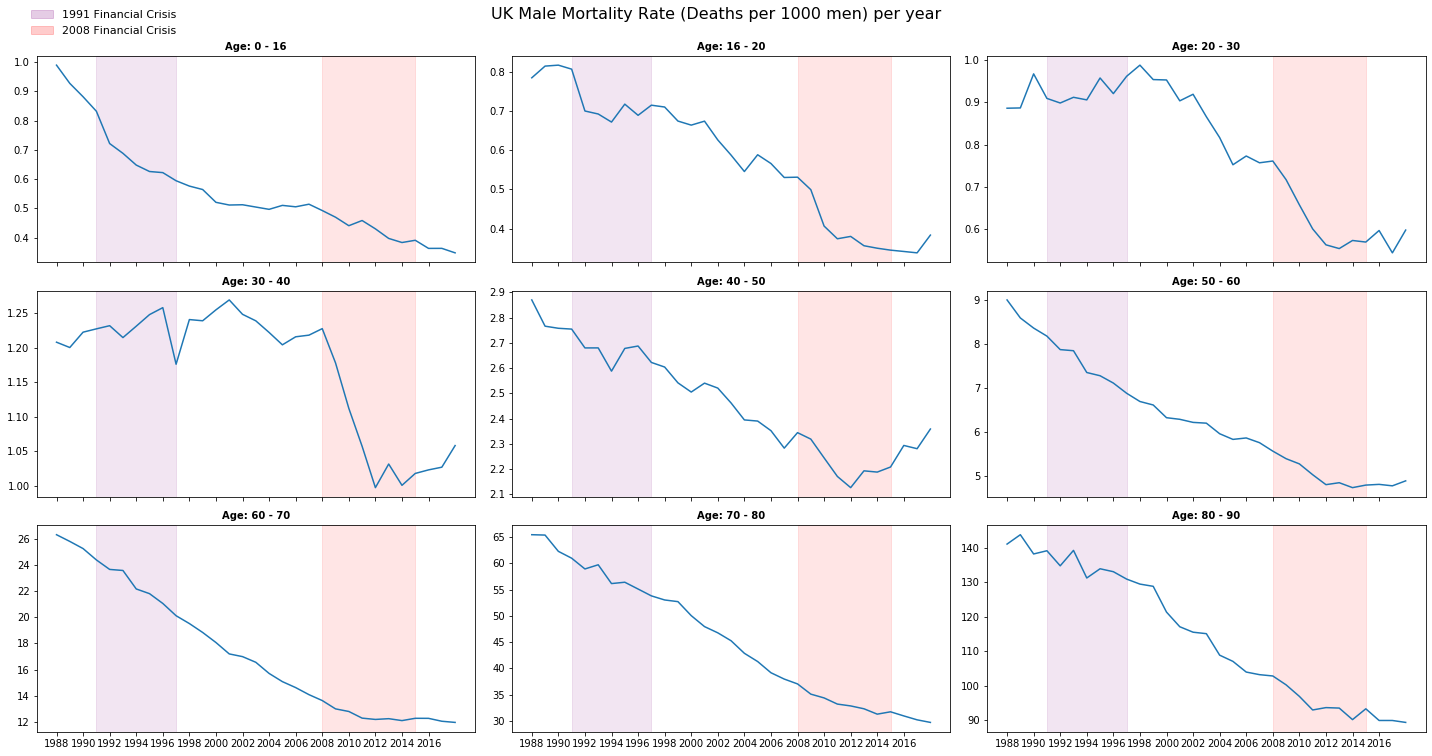

In [16]:
def plot_age_groups(data, figure_title, file_name):
    """Plot mortality rates per year for each age group
    
    Paramaters:
        data : dataframe 
            Male or female deaths or mortality data. 
        figure_title : string
            Sets the title of the plot. 
        file_name : string
            Sets the file name / type to save the plot as locally. 
    """
    # Define 3 x 3 sub-plots where all plots share the same x axis (years)   
    fig, ax = plt.subplots(3,3, figsize=(20,11), sharex=True)

    # Loops through the age_groups dictionary and the subplots,
    # plotting the data for each age group on a seperate sub-plot and 
    # formatting the plot. 
    for age_group, ax in zip(age_groups, ax.flatten()):
        data_for_plot = data[data['age group'] == age_group]['mortality']
        ax.plot(years, data_for_plot)
        ax.set_title('Age: ' + age_group, weight = 'bold', size = 10)
        ax.xaxis.set_ticks(np.arange(years[0], years[-1], 2))
        
        # Highlight the 2008 and 1991 crises 
        ax.axvspan(2008, 2015, alpha=0.1, color='red')
        ax.axvspan(1991, 1997, alpha=0.1, color='purple')
        

    # Add custom legend for the 1991 and 2008 highlights 
    highlight_1991 = mpatches.Patch(color='purple', 
                                    label='1991 Financial Crisis', 
                                    alpha = 0.2)
    highlight_2008 = mpatches.Patch(color='red', 
                                    label='2008 Financial Crisis', 
                                    alpha = 0.2)
    plt.legend(handles=[highlight_1991, highlight_2008], loc = (-2.19,3.35), 
               frameon=False, fontsize = 11).set_in_layout(False)    
        
    fig.suptitle(figure_title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(file_name, dpi=300, bbox_inches='tight')

plot_age_groups(male_pop_grouped, 'UK Male Mortality Rate (Deaths per 1000 men) per year','Male Mortality per Year.pdf')

### Discussion

In the plots, we can see a long term trend of decreasing mortality rates over the years for all age ranges except for the 30 - 40 range, which stays pretty stable until 2008. It is unclear why the 30 - 40 range is not seeing the long term improvements in mortality outcomes of the other groups. The long term decline in mortality rate is generally interrupted or significantly altered during and after the 2008 crisis. 

The 1991 crisis typically has little or no obvious impact on death rates despite causing a similar spike in unemployment levels as the 2008 crisis. Perhaps this is because the unemployment peak of 1991 lasted only a short time whereas the 2008 crisis saw high unemployment levels over a much longer period. 

We suspect that the major drops in mortality seen in the plots are related to a reduction in commuter traffic and driving in general when people become unemployed - this is why we assume reduced traffic levels in the below discussion of each age range. It is worth noting that the female graphs do not show the same drops and we believe this is due to the different driving habits between men and women, including the mode of transport e.g. men ride more bicycles and motorbikes to work which put you at significantly greater risk than a car. As a result, women do not see the same benefits to mortality when they drive less or when there is less traffic. 

Below we discuss each age range: 

  * **0 - 16 age range**: We see the long term mortality rate decline speeds up during both the 1991 and 2008 crisis. Perhaps this is due to better childcare / supervision when parents are unemployed or perhaps is due to a reduction in road traffic and therefore road collisions with children. 
  
  * **16 - 20 age range**: We see significant drops in mortality rates after 1991 and 2008. This is likely due to a reduction in transport related deaths, either because the young drivers in the age range drive less because their parents cannot afford cars or because there is generally less traffic on the roads and so fewer collisions. 
  
  * **20 - 30 age range**: We see a significant drop in 2008 that looks similar to the 2008 drop for the 16 - 20 age range but is larger. It is likely that this is also transport related, again due to people having fewer cars due to finances and due to their being fewer cars on the road and less commuting. The drop may be larger because more people in the 20 - 30 age range have cars (because they earn more money), therefore more deaths are averted when they drive less. It is unclear why the 1991 recession had no obvious impact on this age group but did on the 16 - 20 age group. 
  
  * **30 - 40 age range**: We see a significant drop in mortality rates in 2008 followed by a slow rise. The drop is likely due to the reduction in transport related deaths. The slow rise could be a return to pre-2008 transport deaths as people return to the road. However, we believe it is more likely that this is represents an increase in suicides or poor health because the female equivalent in the 30 - 40 age range doesn't have the transport related drop but does have the slow rise (thus the rise is likely not transport related) and the same is true for the male 40 - 50 age range.

  * **40 - 50 age range**: We see what may be a drop in mortality in 2008, although it doesn't look significantly different to the long term trend so may be a natural fluctuation. We don't see the same large drop that the younger age ranges showed that we think are linked to transport deaths. This may be because the older age group drives more safely and there are fewer people riding bicycles and motorbikes at this age which make them particularly vulnerable, and thus fewer deaths are avoided when traffic levels are reduced. The initial drop is followed by a rise in deaths that is in sharp contrast to the long term decline in mortality rate for this group. Perhaps this represents an increase in suicides and poor health due to the recession. 
  
  * **50 - 90 age range**: The plots for men aged over 50 all look broadly the same, showing a consistent linear decrease in mortality rates over the years until around 2008 when this decrease noticeably slows down. We suspect that this is due to a negative impact on old age care, perhaps due to more elderly having to go into state care homes rather than private care homes because the children cannot afford it. Austerity measures were introduced to the UK in 2008, these are often linked with poorer NHS capacity and health outcomes, so this may also be a significant factor.  

### Female Mortality Rates Per Year for Different Age Groups

Below we plot the **female mortality rates per year** between 1988 and 2018. The period over which the 1991 and 2008 Financial crises raised unemployment levels is highlighted.

In [1]:
plot_age_groups(female_pop_grouped, 'UK Female Mortality Rate (Deaths per 1000 women) per year','Female Mortality per Year.pdf')

NameError: name 'plot_age_groups' is not defined

### Discussion

The male and female plots share many similarities. Here we will only discuss interesting differences between them. 

The first obvious difference, as stated above, is that the 20 - 30 and 30 - 40 age ranges do not have large drops in mortality in 2008. We suspect that this drop for men was due to a reduction in transport related deaths which comes about because people drive less due to becoming unemployed, so no longer commute to work. Fewer cars on the road and fewer cyclists and motorbike commutes means men will generally face a lower risk of death. Women are generally deemed safer drivers and far fewer women cycle and motorbike to work, so drops in traffic have a much smaller impact on their mortality rates since far fewer women die from transport deaths generally. 

We see that the 30 - 40 age range for women has the long term decline in mortality rates over the years. This trend did not appear to be present for men in the same age range. It is unclear why this is the case. 

Finally, we see a slightly different behaviour in the 16 - 20 age range. In both 1991 and 2008 we see a drop followed shortly by a recovery in the mortality rate, creating a V-shape. Men experience this drop but not the recovery and it is unclear why the female mortality rate jumps back up sooner than the male rate. We suspect the initial drop is due to a reduction in transport related deaths, the same as for men. We suspect that young women are significantly less safe than older women on the road, and thus at this age experience a similar drop to men.   

### Male and Female Mortality Rates

Below we plot the **male and female mortality rates per year** on the same figure between 1988 and 2018. The period over which the 1991 and 2008 Financial crises raised unemployment levels is highlighted.

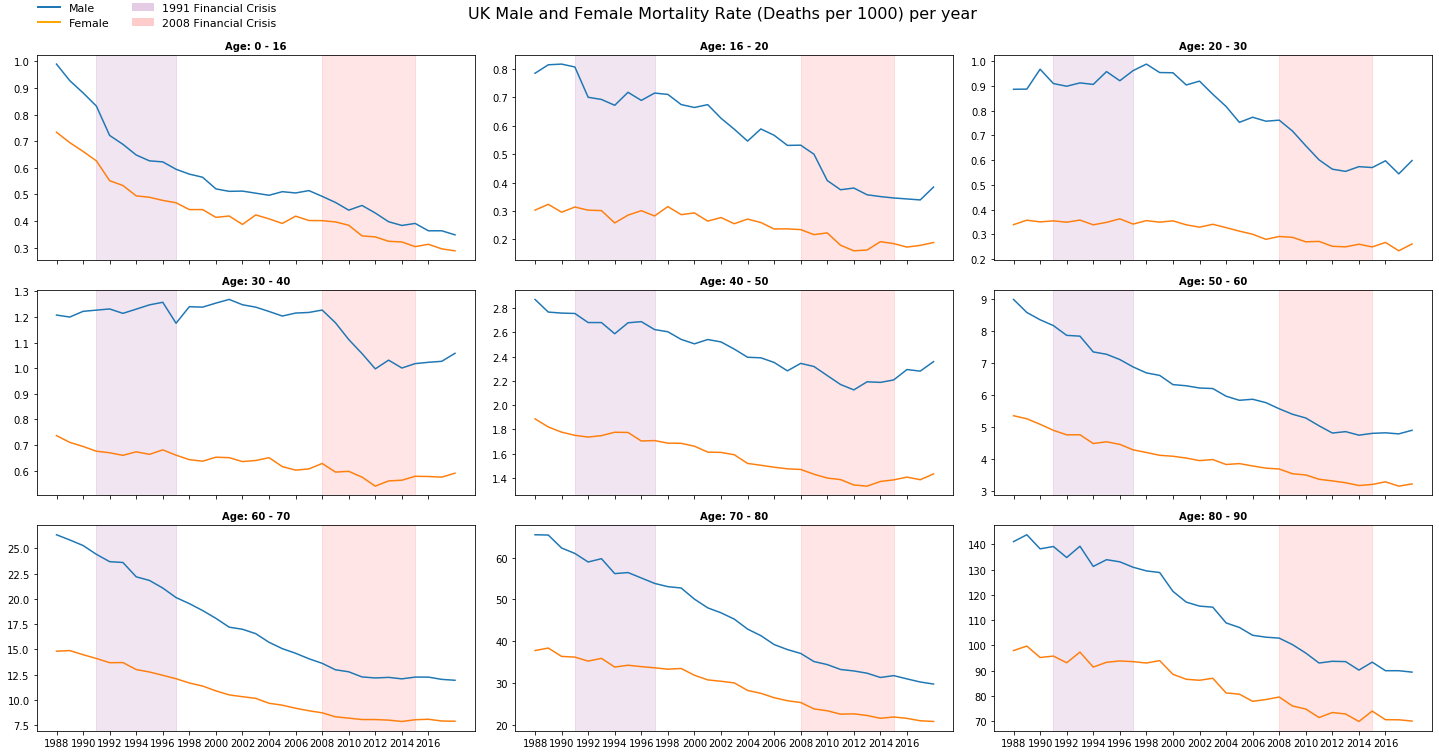

In [18]:

    # Define 3 x 3 sub-plots where all plots share the same x axis (years)
    fig, ax = plt.subplots(3,3, figsize=(20,11), sharex=True)

    # Loops through the age_groups dictionary and the subplots,
    # plotting the data for each age group on a seperate sub-plot and 
    # formatting the plot. 
    for age_group, ax in zip(age_groups, ax.flatten()):
        data_for_plot = male_pop_grouped[male_pop_grouped['age group'] == age_group]['mortality']
        ax.plot(years, data_for_plot)
        data_for_plot = female_pop_grouped[female_pop_grouped['age group'] == age_group]['mortality']
        ax.plot(years, data_for_plot)
        ax.set_title('Age: ' + age_group, weight = 'bold', size = 10)
          ax.xaxis.set_ticks(np.arange(years[0], years[-1], 2))
        
        # Highlight the 2008 and 1991 crises 
        ax.axvspan(2008, 2015, alpha=0.1, color='red')
        ax.axvspan(1991, 1997, alpha=0.1, color='purple')
    
    # Plot legend for the 2008 / 1991 highlights and male and female curves 
    legend_elements = [Line2D([0], [0], color='C0', lw=2, label='Male'),
                       Line2D([0], [0], color='orange', lw=2, label='Female'),
                       mpatches.Patch(facecolor='purple', alpha = 0.2, label='1991 Financial Crisis'),
                       mpatches.Patch(facecolor='red', alpha = 0.2, label='2008 Financial Crisis')]
    plt.legend(handles = legend_elements, loc = (-2.19,3.4), frameon=False, fontsize = 11,ncol = 2).set_in_layout(False)
    
    fig.suptitle('UK Male and Female Mortality Rate (Deaths per 1000) per year', fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig('Male and female Mortality per Year.pdf', dpi=300, bbox_inches='tight')

### Discussion

The female mortality rates are lower than male mortality rates for all age ranges in all years, which is what we would expect given that women live longer than men on average. The gap between women and men's mortality rates is narrowing for most age ranges over the years.  

The gap between men and women narrows significantly around 2008 for the 16 - 40 age range. We suspect these drops are due to a reduction in transport related deaths due to fewer people commuting after becoming unemployed. If this is correct, then a significant portion of the gap between male and female mortality rates in this age range is due to male deaths on the road. 

### Conclusions

We see that men in the 16 - 40 age range typically see the largest reduction in mortality rates at the onset of the 2008 financial crash, and thus benefit most from this pro-cyclical mortality effect. We suspect that this reduction is due to fewer transport related deaths occurring because people have become unemployed and therefore no longer commute to work. This reduces the number of bicycle and motorbike commutes, which are high risk modes of transport, and reduces traffic on the roads in general resulting in fewer collisions. Women do not see these same reductions in mortality at these age ranges (excluding the 16 - 20 range) and we believe this is because far fewer women cycle or motorbike to work and that women older than 20 are generally much safer drivers than men. 

There is a long term reduction in mortality rates over the years in most age groups for men and women. This is significantly disrupted by the 2008 crisis and appears to be reversed in the 30 - 50 age ranges and slowed down or halted in the rest. We believe the 30 - 50 range increase in mortality may be due to suicides or poor health following job losses and low incomes. The long term linear reduction in mortality rates for the 50 - 90 year olds is slowed down by the 2008 crisis, potentially due to the introduction of austerity measures in the UK. 

The disruption to long term decreasing mortality rates represents a longer term and more subtle impact of financial crises. This suggests that in the long run, more people will die than if those decreasing mortality trends had continued. 

Finally, it is worth noting that the 1991 crisis had a relatively small impact compared with the 2008 crisis. 

### Further work 

The mortality rates could be broken down by specific category of death e.g. suicide, transport, pollution etc. to test the conclusions drawn above and to provide a clear picture of how different causes of deaths change during a financial crisis.  

The impact to the total UK mortality rate (all age groups) due to the dynamics of each age range could be quantified to assess how important the different jumps and drops in mortality were to the UK as a whole. 


### Tracking mortality rate of groups as they age

Above, we looked at how the mortality rate of different age groups changed in different years e.g. how the 10 - 20 year olds mortality rate changed between 2008 and 2018. This tells us how the mortality rate of a person in that age range is impacted by the 2008 crisis in those years. This does not track individuals over the years, it tracks an age-group. The make-up of the age group will change each year as people age and move into higher age-groups. 

As such, it cannot tell you how a person's future mortality rate is impacted by the 2008 crisis e.g. if I'm aged 16 in 2008, by 2012 I am no longer in the 10 - 20 age range, I'm in the 20 - 30 age range, so my mortality rate would now be found in the 20 - 30 chart. Because people move up through the age groups through the years, we can't use the previous plots to understand how an individual's mortality curve has been impacted in later years by the 2008 or 1991 crises. 

As such, we will now track the mortality of specific groups of people and see how these people's mortality changes over the years and what the longer term impacts of a financial crisis are on the group. We will group people based on the decade they were born, for example, we will track the people born between 1988 and 1998 and see how the mortality rates of these people changed over the years. We will also be able to compare the mortality curves between different groups when they were the same age e.g. compare the mortality curve of people born in 1968 - 1978 with the people born in 1978 - 1988 when they were both in their 20's. This allows us to see how mortality rates have changed for different generations of people and also should allow us to identify divergence from typical mortality curve behaviour caused by the financial crisis. 

To perform this analysis, we need to shift the original deaths / population data (with a column for each year) so each row corresponds to a single birth year. Consider that if you were born in 2000, in 2001 you would be 1 and thus your population / deaths data would now be 1 row down from previously. In 2002 you are 2, which is one further row down. 

|Age|2000|2001|2002|
|---|---|---|---|
|0|**230**|350|400|
|1|300|**240**|360|
|2|180|320|**260**|

We need to shift the data upwards by increasingly large increments to align birth years horizontally i.e. to make each row correspond to a separate birth year: 

|Age|2000|2001|2002|
|---|---|---|---|
|-2|na|na|400|
|-1|na|350|360|
|0|**230**|**240**|**260**|
|1|300|320|na|
|2|180|na|na|

The row index now defines the age of the person in 2000. The negative index rows are rows where the people are not born yet in 2000. They will be born in future years (remember every year introduces a new set of 0 year olds). The magnitude of the index tells you when they will be born e.g. row -2 will be born 2 years after 2000.

The na values below the 0 row represent when a birth year is no longer being followed in the data we have. e.g. in the table above, we don't track beyond 2 years old, so the values turn to na when they becomes older than 2. 

Below we perform this birth year data shift on the male and female deaths and population data. 

In [60]:
def align_years_horizontally(data):
    """Shift population or deaths data so that each row corresponds to
    a seperate birth year"""
    
    # Loop through years in the data (2000 - 2018) and for each year, 
    # add a new blank row with an increasingly negative index and 
    # shift the corresponding year column up by increasing amounts. 
    # The first year column is skipped.  
    for index, year  in enumerate(years):
        if index > 0:
            data = data.append(pd.Series(name=-index)).sort_index()
            data[year] = data[year].shift(-index)
    return data
        
male_deaths = align_years_horizontally(male_deaths)
female_deaths = align_years_horizontally(female_deaths)

male_pop = align_years_horizontally(male_pop)
female_pop = align_years_horizontally(female_pop)

male_pop.head()

/Users/rupe/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # This is added back by InteractiveShellApp.init_path()


,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,age group
-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382332.0,NaN
-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,391425.0,395273.0,NaN
-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,401630.0,405063.0,408684.0,NaN
-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398539.0,402554.0,405600.0,408882.0,NaN
-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,398946.0,403020.0,406751.0,409631.0,412553.0,NaN


We will be grouping people by the decade they were born. To do this, we need to add a column that calculates the birth year of each row. This is done below by subtracting the row index from the first year in the datset (1988) (remember that the row index gives us the age of the person in the first year of the dataset).  

In [61]:
def add_birth_year(data):
    """Adds 'birth year' column"""
    
    data['birth year'] = years[0] - data.index
    return data
    
male_deaths = add_birth_year(male_deaths)
female_deaths = add_birth_year(female_deaths)

male_pop = add_birth_year(male_pop)
female_pop = add_birth_year(female_pop)

female_pop.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,age group,birth year
-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362931.0,NaN,2018
-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371776.0,375341.0,NaN,2017
-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380820.0,384222.0,387630.0,NaN,2016
-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378230.0,382188.0,385080.0,388301.0,NaN,2015
-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379305.0,383105.0,386860.0,389445.0,392101.0,NaN,2014


We will define a birth-groups dictionary that defines the birth decades we will group people by. From now on the term birth-group will refer to different groupings of people by birth decade e.g. the 1988 - 1998 birth-group is the group of people born between 1988 - 1998. We will include both the upper and lower birth year limits of the group in the dictionary. This will be used later to calculate the age of the group over the years.  

Below we define the birth groups dictionary and assign each row to its corresponding birth group in the populations and deaths data. 

In [62]:
birth_groups = {'1988 - 1908':[1908,1918],'1908 - 1918':[1908,1918],
                '1918 - 1928':[1918,1928], '1928 - 1938':[1928,1938], 
                '1938 - 1948': [1938,1948],'1948 - 1958':[1948,1958], 
                '1958 - 1968':[1958,1968], '1968 - 1978':[1968,1978],
                '1978 - 1988':[1978,1988], '1988 - 1998':[1988,1998], 
                '1998 - 2008':[1998,2008], '2008 - 2018':[2008,2018]
            } 

In [63]:
def add_birth_group(data, birth_groups):
    """
    Add column 'birth group' to data dataframe.
    
    Paramaters:
        data : dataframe 
            The UK deaths per age or population per age dataframes, 
            for either males or females. 
        age_groups : dict
            The birth-groups that the data will be grouped by, in 
            this case defined by the birth year of the group. 
        
    Returns: 
        data : dataframe
            The original data dataframe with a new column 'birth group'
            that assigns each row to is associated birth-group e.g. a 
            person who was born in 1920 belongs to the the 1918 - 1928
            years group.  
    """
    
    # Create new column 'birth group' by applying identify_birth_group 
    # function to each element of 'birth year', which returns the birth 
    # group associated with that age / row
    data['birth group'] = [identify_birth_group(year_born, birth_groups) 
                           for year_born in data['birth year']]
    return data

def identify_birth_group(year_born, birth_groups):
    """Return birth group associated with a year_born"""
    
    # Loops through birth groups and associated upper and lower limits
    # of the group, and checks whether the year_born value is less 
    # than the upper limit of the birth group. When the condition is 
    # met, the associated birth group is returned.
    for birth_group, group_limits in birth_groups.items():
        if year_born <= group_limits[1]:
            return birth_group

male_deaths = add_birth_group(male_deaths, birth_groups)
female_deaths = add_birth_group(female_deaths, birth_groups)

male_pop = add_birth_group(male_pop, birth_groups)
female_pop = add_birth_group(female_pop, birth_groups)

female_pop.head(10)

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,age group,birth year,birth group
-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362931.0,NaN,2018,2008 - 2018
-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,371776.0,375341.0,NaN,2017,2008 - 2018
-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380820.0,384222.0,387630.0,NaN,2016,2008 - 2018
-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,378230.0,382188.0,385080.0,388301.0,NaN,2015,2008 - 2018
-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,379305.0,383105.0,386860.0,389445.0,392101.0,NaN,2014,2008 - 2018
-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,385946.0,389528.0,393156.0,396501.0,399096.0,401270.0,NaN,2013,2008 - 2018
-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,397837.0,400531.0,403832.0,406959.0,410067.0,412302.0,414348.0,NaN,2012,2008 - 2018
-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,390827.0,393627.0,396066.0,398979.0,401913.0,404600.0,406442.0,408199.0,NaN,2011,2008 - 2018
-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,386673.0,385277.0,387710.0,389601.0,392256.0,394805.0,396926.0,398616.0,400663.0,NaN,2010,2008 - 2018
-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,382093.0,381637.0,382279.0,384339.0,386070.0,388465.0,390552.0,392573.0,394153.0,395813.0,NaN,2009,2008 - 2018


We will be measuring the mortality rates of birth groups born within the same decade i.e. born within a 10 year period such as 1988 - 1998. As discussed above, when we shift the data to align birth years horizontally, we end up with some null values which correspond to people not having been born yet or being older than the data we have, in this case older than 89. 

Thus, for certain birth groups in certain years, we will not be able to aggregate across 10 years of people, because some of the group havent been born yet or have aged older than 89. For example, in 1995 the 1988 - 1998 age group only includes the people born between 1988 and 1995 because the people born between 1995 and 1998 have not been born yet (because the year is 1995)! Calculating the mortality of this birth group in 1995 would in actual fact be calculating the mortality for the people born between 1988 and 1995. Since this is not actually tracking the people born in the decade 1988 - 1998 as we want, we don't want to include the 1995 data for this birth group. Also note, that changing the birth years of the group will change the weighting of younger and older people and will thus significantly change the mortality rate calcalted. 

As such, we will exclude the years for a birth group where not all people are available for the birth group, either due to not being born yet or being older than 89. We will also exclude any birth-groups which, after removing these years from the data, have fewer than 5 years of data (since we want to review long term trends).   

In [64]:
def remove_incomplete_groups(data):
    """Remove incomplete birth groups in population or deaths data and 
    update the birth_groups dictionary.
    
    If any values for a birth-group in a specific year are na, then all
    values for that year will be set as null. Any birth-groups that 
    have fewer than 5 years of non-null data are then removed. These
    birth-groups are then removed from the birth_groups dictionary. 
    
    """
    
    birth_group_column = data['birth group']
    # Loop through each year in data and identify all birth-groups 
    # in that year with at least 1 na value.
    for year in years:
        rows_with_na_values_in_year = data[year].isna()
        groups_with_na = birth_group_column[rows_with_na_values_in_year].drop_duplicates()     
        
        # Find the rows that correspond to the birth groups identified 
        # and set these rows as null for the current year (effectively
        # removing that year from the data).   
        rows_with_na_group = birth_group_column.isin(groups_with_na)
        data.loc[rows_with_na_group,year] = np.NAN
    
    # We want to identify the birth groups with fewer than 5 years of 
    # non-na entries and remove them. We only need to look at a single 
    # row per birth group to see how many na years it has in total 
    # (since the above loop ensure each year has either no na or only 
    # na for that birth group). Thus, we will remove duplicates on 
    # the birth groups column to get a single row per birth group.
    unique_birth_groups_data = data.drop_duplicates('birth group').reset_index()
    
    birth_groups_to_delete = []
    
    # Calculates the max number of na years a birth group can have to still
    # have 5 years of non-na data. 
    max_na_years = years[-1] - years[0] - 5
    
    # Loops through the removed duplicates birth group data, counts
    # the number of na years in the data and checks whether it is 
    # fewer than the max na years allowed. If it isn't, it saves 
    # the birth-group in a list for deletion.  
    for row in range(unique_birth_groups_data.shape[0]):
        years_data_for_birthgroup = unique_birth_groups_data.loc[row, years]
        if years_data_for_birthgroup.isnull().sum() > max_na_years:
            (birth_groups_to_delete
             .append(unique_birth_groups_data.loc[row, 'birth group'])
            )
    
    # Find row index's for the birth-groups being deleted and delete them.     
    rows_to_delete = (data[data['birth group'].isin(birth_groups_to_delete)]
                     .index
                 )
    data.drop(rows_to_delete, inplace = True)
    
    # Delete birth-groups from birth_groups dictionary 
    for key in birth_groups_to_delete:
        if key in birth_groups:
            del birth_groups[key]
    
    return data

male_deaths = remove_incomplete_groups(male_deaths)
female_deaths = remove_incomplete_groups(female_deaths)

male_pop = remove_incomplete_groups(male_pop)
female_pop = remove_incomplete_groups(female_pop)

male_deaths.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,age group,birth year,birth group
-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2123.0,127.0,77.0,46.0,46.0,36.0,46.0,39.0,24.0,34.0,39.0,NaN,2008,1998 - 2008
-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.0,73.0,61.0,40.0,44.0,29.0,34.0,29.0,29.0,24.0,39.0,NaN,2007,1998 - 2008
-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,42.0,39.0,44.0,36.0,43.0,26.0,31.0,29.0,30.0,39.0,NaN,2006,1998 - 2008
-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,34.0,38.0,36.0,27.0,28.0,39.0,38.0,32.0,39.0,46.0,NaN,2005,1998 - 2008
-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,41.0,39.0,30.0,39.0,28.0,40.0,42.0,36.0,46.0,54.0,NaN,2004,1998 - 2008


Now we can sum the deaths / population of the people in each birth group to get total deaths / population per birth group per year. 

In [65]:
def aggregate_birth_groups(data):
    """Returns sum of deaths or population across birth groups for each year"""
    return data.groupby(data['birth group'])[years].sum().reset_index()

male_deaths_grouped_by_birth = aggregate_birth_groups(male_deaths)
female_deaths_grouped_by_birth = aggregate_birth_groups(female_deaths)

male_pop_grouped_by_birth = aggregate_birth_groups(male_pop)
female_pop_grouped_by_birth = aggregate_birth_groups(female_pop)

female_pop_grouped_by_birth.head(10)

,birth group,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1918 - 1928,3100831.0,3056231.0,3006075.0,2954401.0,2899418.0,2840895.0,2778249.0,2712270.0,2640567.0,2564894.0,2486800.0,2402755.0,2314180.0,2226074.0,2129960.0,2026792.0,1919094.0,1809092.0,1697934.0,1584829.0,1468875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1928 - 1938,3053792.0,3037543.0,3018531.0,2998852.0,2980746.0,2960378.0,2938578.0,2914786.0,2889515.0,2861988.0,2833249.0,2802407.0,2771397.0,2735240.0,2694650.0,2651665.0,2603805.0,2553391.0,2495776.0,2438499.0,2381144.0,2319037.0,2254500.0,2186323.0,2115537.0,2036781.0,1958522.0,1866715.0,1773796.0,1673070.0,1564765.0
2,1938 - 1948,3592423.0,3588078.0,3582532.0,3577642.0,3570948.0,3563848.0,3556483.0,3546560.0,3537207.0,3526353.0,3513646.0,3501184.0,3490162.0,3472225.0,3454745.0,3430736.0,3406433.0,3378127.0,3347734.0,3317340.0,3291609.0,3262894.0,3231590.0,3199240.0,3166646.0,3131218.0,3094533.0,3052692.0,3006968.0,2956383.0,2900315.0
3,1948 - 1958,3867444.0,3867978.0,3875726.0,3882326.0,3882189.0,3880746.0,3883618.0,3879585.0,3877605.0,3874734.0,3870875.0,3869913.0,3871493.0,3863181.0,3854109.0,3842209.0,3827756.0,3815138.0,3802771.0,3789987.0,3774279.0,3762196.0,3747920.0,3734833.0,3721776.0,3707985.0,3695703.0,3682176.0,3666334.0,3647078.0,3625075.0
4,1958 - 1968,4548289.0,4550511.0,4550398.0,4560305.0,4556251.0,4553189.0,4561523.0,4562019.0,4564737.0,4568256.0,4570011.0,4576461.0,4587276.0,4588415.0,4596294.0,4594135.0,4597575.0,4599744.0,4596690.0,4601047.0,4593448.0,4590489.0,4584068.0,4579183.0,4574774.0,4570818.0,4569188.0,4567812.0,4564257.0,4558900.0,4553113.0
5,1968 - 1978,3717480.0,3725464.0,3733536.0,3747437.0,3757899.0,3769135.0,3785838.0,3806874.0,3826512.0,3851491.0,3878711.0,3919972.0,3970934.0,4011043.0,4043647.0,4076346.0,4106326.0,4155691.0,4189128.0,4208022.0,4234245.0,4249966.0,4260701.0,4264596.0,4264618.0,4266584.0,4271504.0,4280193.0,4288537.0,4292528.0,4296138.0
6,1978 - 1988,3584090.0,3589104.0,3595030.0,3603471.0,3604661.0,3606624.0,3610459.0,3614572.0,3618427.0,3618807.0,3622764.0,3628909.0,3626297.0,3653000.0,3690144.0,3743671.0,3814346.0,3924166.0,4014813.0,4106291.0,4177275.0,4220966.0,4278400.0,4325662.0,4341669.0,4357036.0,4375103.0,4401720.0,4419702.0,4432260.0,4444178.0
7,1988 - 1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3665378.0,3670000.0,3667178.0,3666603.0,3680691.0,3696656.0,3706113.0,3718200.0,3733224.0,3760495.0,3797450.0,3838522.0,3881080.0,3944506.0,3981247.0,4016785.0,4064719.0,4127062.0,4182430.0,4223667.0,4267983.0
8,1998 - 2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3501312.0,3511387.0,3522699.0,3529437.0,3544346.0,3559333.0,3577987.0,3597195.0,3617723.0,3637815.0,3666646.0


We will now unpivot the data to make calculations and plotting easier. This will get us a data set with columns *birth group*, *year* and *deaths* or *population*.  

In [66]:
def unpivot_birth(data, death_or_population, year):
    """Returns unpivoted data, where years are shown as a single column
    
    Paramaters: 
        data : dataframe
            Dataframe you want to unpivot
        death_or_population : string
            String to set name of last column, either as 'Deaths' or 'Population'
        year : list
            List of the years contained in the dataset to be unpivoted. 
    """
    return pd.melt(data, id_vars=['birth group'], value_vars = year, 
                   var_name = 'Year', value_name = death_or_population)

male_deaths_grouped_by_birth = unpivot_birth(male_deaths_grouped_by_birth, 
                                             'Deaths', years)
female_deaths_grouped_by_birth = unpivot_birth(female_deaths_grouped_by_birth, 
                                             'Deaths', years)

male_pop_grouped_by_birth = unpivot_birth(male_pop_grouped_by_birth, 
                                             'population', years)
female_pop_grouped_by_birth = unpivot_birth(female_pop_grouped_by_birth, 
                                             'population', years)
female_deaths_grouped_by_birth.head()

,birth group,Year,Deaths
0,1918 - 1928,1988,45944.0
1,1928 - 1938,1988,16351.0
2,1938 - 1948,1988,6780.0
3,1948 - 1958,1988,2850.0
4,1958 - 1968,1988,1543.0


We will now calculate mortality rates for each age group, by dividing the deaths by population and multiplying by 1000. 

In [67]:
male_pop_grouped_by_birth['mortality'] = ( (male_deaths_grouped_by_birth['Deaths'] 
                                            / male_pop_grouped_by_birth['population'])
                                            *1000
                                         )
female_pop_grouped_by_birth['mortality'] = ( (female_deaths_grouped_by_birth['Deaths'] 
                                            / female_pop_grouped_by_birth['population'])
                                            *1000
                                         )
female_pop_grouped_by_birth.head()

,birth group,Year,population,mortality
0,1918 - 1928,1988,3100831.0,14.816673
1,1928 - 1938,1988,3053792.0,5.354327
2,1938 - 1948,1988,3592423.0,1.887306
3,1948 - 1958,1988,3867444.0,0.736921
4,1958 - 1968,1988,4548289.0,0.339248


Finally, we will calculate the ages of each birth group in each year e.g. in 2008 the birth group 1988 - 1998 was aged between 20 and 30. We will add this data and use it to compare mortality rates of different birth groups when they were the same age. For simplicity, we will use the middle of the age range as the age of the group e.g. if the age in 2008 is between 10 - 20 then we will report this as 15 - this will make the plots easier to read.   

In [68]:
def add_age_of_group(data, birth_groups):
    """Add 'age of group' column to dataframe"""   
    
    # Map the birth groups in the data to the birth_groups dictionary 
    # to get the upper and lower birth year limits list in the dictionary, 
    # and use .str[0] to take the first element in this list (the lower year). 
    # Then calculate the current age of the group from the year column, adding
    # 5 to the lower age to get the middle age of the group.  
    lower_birth_year = data['birth group'].map(birth_groups).str[0]
    data['age of group'] = data['Year'] - lower_birth_year - 5
    return data

male_pop_grouped_by_birth = add_age_of_group(male_pop_grouped_by_birth, birth_groups)
female_pop_grouped_by_birth = add_age_of_group(female_pop_grouped_by_birth, birth_groups)

### Birth Group Mortality Rates - probably delete this section....

Below we will plot the mortality rates for different birth groupsbetween...with xa nd y highlighted...

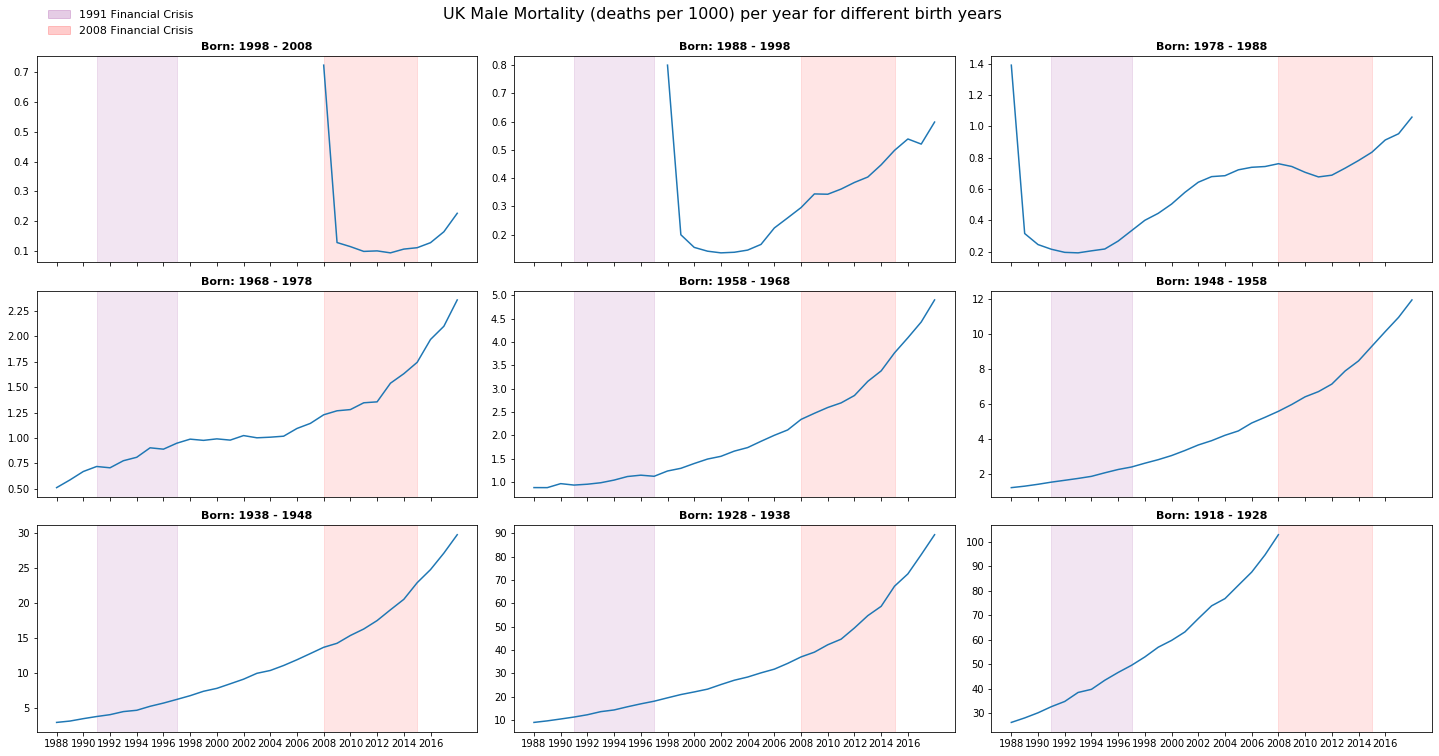

In [69]:
def plot_birth_groups(data, figure_title, file_name):
    """Plot mortality rates per year for each birth group
    
    Paramaters:
        data : dataframe 
            Male or female mortality data. 
        figure_title : string
            Sets the title of the plot. 
        file_name : string
            Sets the file name / type to save the plot as locally. 
    """
    
    # The number of subplot rows changes based on the number of birth groups. 
    fig, ax = plt.subplots(int(round(len(birth_groups)/3)),3, figsize=(20,11), sharex=True)

    # Loops through the birth_groups dictionary (in reverse order) and the subplots,
    # plotting the data for each birth group on a seperate sub-plot and 
    # formatting the plot. 
    for birth_group, ax in zip(sorted(birth_groups.keys(), reverse=True), ax.flatten()):
        data_for_plot = data[data['birth group'] == birth_group]['mortality']
        ax.plot(years, data_for_plot)
        #ax.set_title('Birth Year: ' + r"$\bf{" + get_year_born(birth_group) + "}$" + '\nAge in 2008: ' + r"$\bf{"+ birth_group + "}$", size = 10)
        ax.set_title('Born: ' + birth_group, fontweight = 'bold', size = 11)
        #ax.text(1999, (data_for_plot.max()*1.1), 'Age in 2008: ' + r"$\bf{"+ birth_group + "}$" ,color='grey', size = 12)
        ax.axvspan(2008, 2015, alpha=0.1, color='red')
        ax.axvspan(1991, 1997, alpha=0.1, color='purple')
        ax.xaxis.set_ticks(np.arange(years[0], years[-1], 2))

    highlight_1991 = mpatches.Patch(color='purple', label='1991 Financial Crisis', alpha = 0.2)
    highlight_2008 = mpatches.Patch(color='red', label='2008 Financial Crisis', alpha = 0.2)
    plt.legend(handles=[highlight_1991, highlight_2008], loc = (-2.15,3.35), frameon=False, fontsize = 11).set_in_layout(False)
    
    fig.suptitle(figure_title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(file_name, dpi=300, bbox_inches='tight')
    
plot_birth_groups(male_pop_grouped_by_birth, 'UK Male Mortality (deaths per 1000) per year for different birth years','Male Mortality by Birth group per Year.pdf')

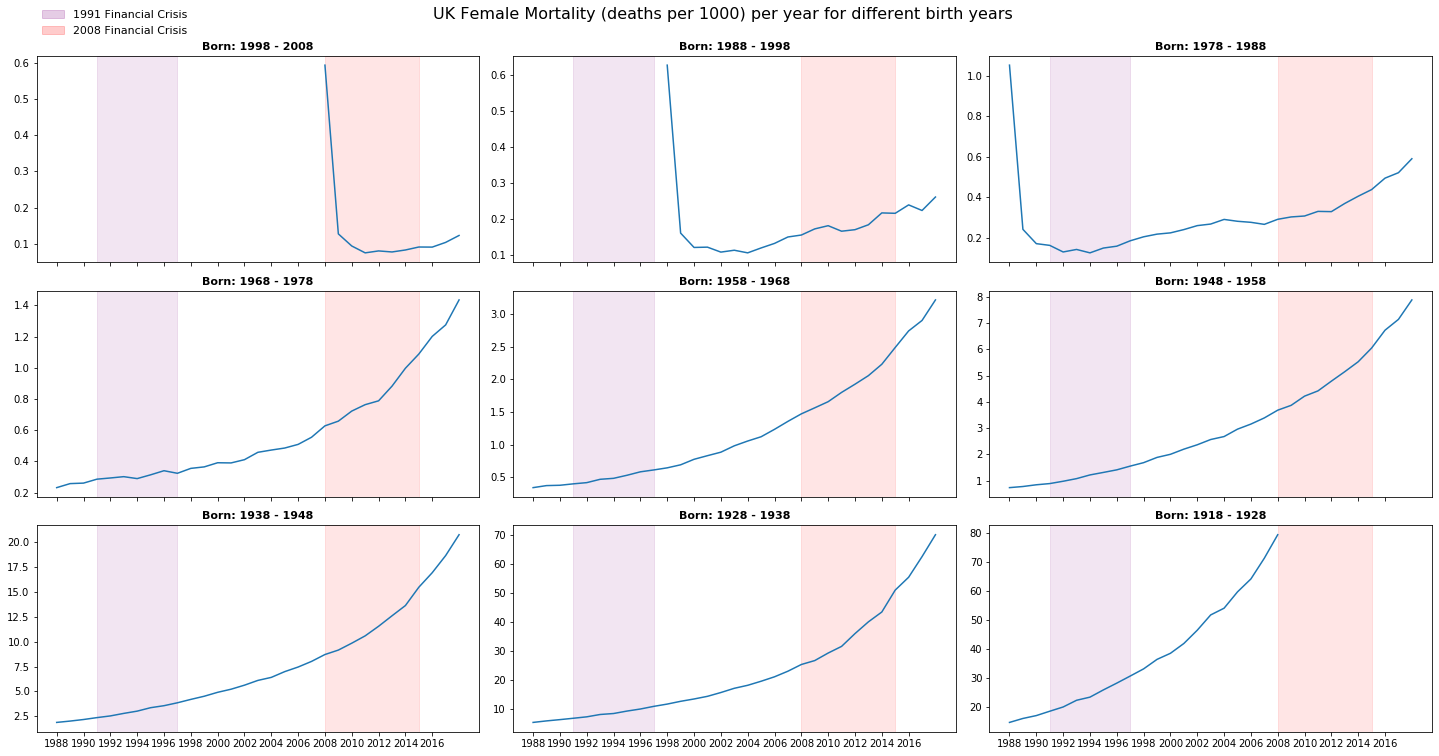

In [70]:
plot_birth_groups(female_pop_grouped_by_birth, 'UK Female Mortality (deaths per 1000) per year for different birth years','Female Mortality by Birth group per Year.pdf')

Why plot in seperate graphs...how best to display data, tried various approaches and settled omn this as comprmise betweenb ibnterpetability abnd use of data. didnt want too many graphs on same plot or to diminsih data variations too much. ....

interpretaion of graph, 3 decades per plot, top is 1991, second is follow on from this and thrid is 2008...etc. etc. 

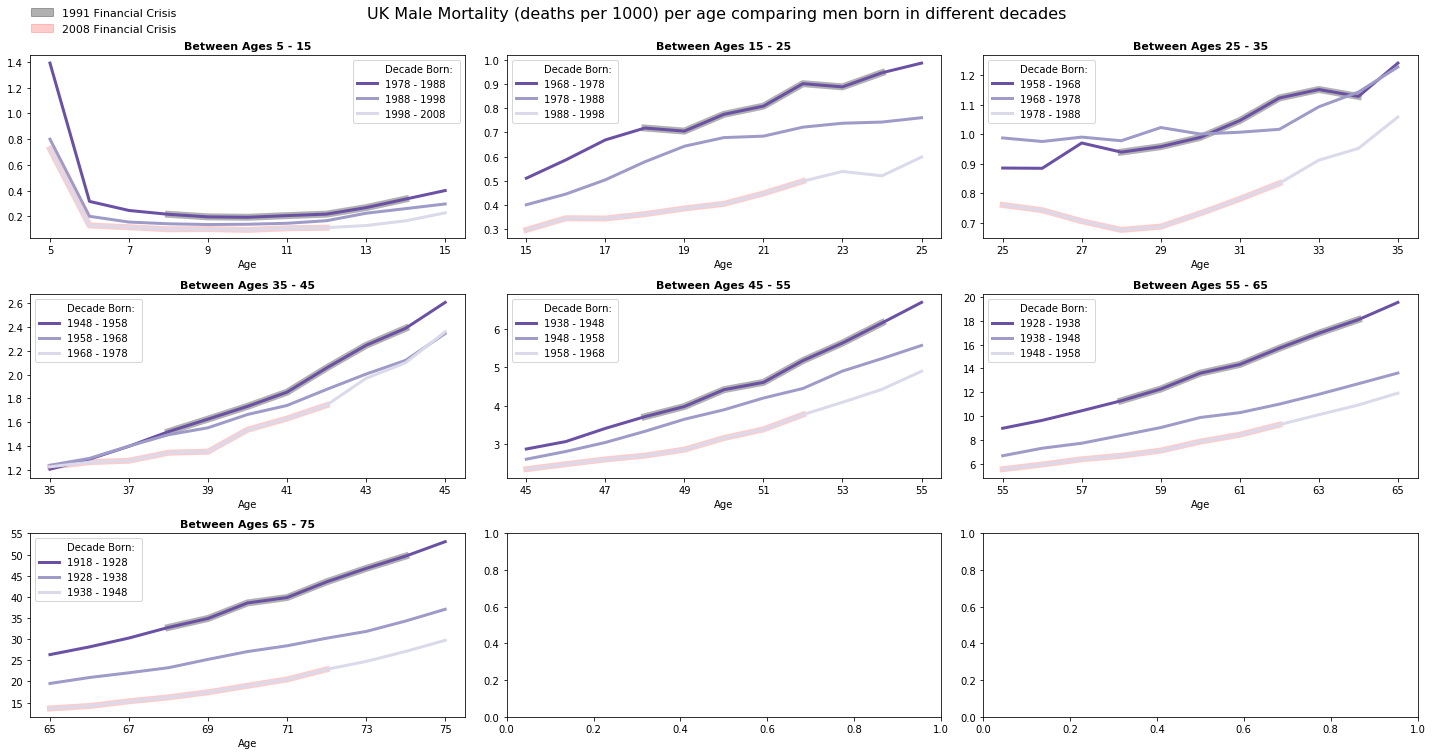

In [71]:
def plot_same_age_range(data, birth_groups, figure_title, file_name):
    number_of_plots = len(birth_groups) - 2
    fig, axes = plt.subplots(int(round(number_of_plots/3)),3, figsize=(20,11))
    #sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})


    birth_groups_keys = sorted(birth_groups.keys(), reverse=True)
    
    birth_groups_per_plot = []
    for plot_reference in range(number_of_plots):
        birth_groups_in_plot = []
        for first_three_indexes in range(3):
            birth_groups_in_plot.append(birth_groups_keys[plot_reference + first_three_indexes])
        birth_groups_per_plot.append(birth_groups_in_plot)

    #color = sns.choose_colorbrewer_palette('sequential') 

    #palette = dict(zip(list(birth_groups), sns.color_palette('Paired')))

    for lower_age_limit, axe, birth_groups_in_plot in zip(range(5,75,10), axes.flatten(), birth_groups_per_plot):
        data_for_birth_groups_in_plot = data[data['birth group'].isin(birth_groups_in_plot)]
        
        min_age_in_plot = lower_age_limit
        max_age_in_plot = min_age_in_plot + 10
        #print(min_age_in_plot, max_age_in_plot)
        
        plot_data = data_for_birth_groups_in_plot[data_for_birth_groups_in_plot['age of group'].between(min_age_in_plot, max_age_in_plot)]
        

        
        line_width = [3,3,3]

        plot = sns.lineplot(x=plot_data['age of group'],
            y = plot_data['mortality'],
            hue = plot_data['birth group'], ax = axe, palette = "Purples_r", size = plot_data['birth group'], sizes = line_width)        
        
        start_of_2008 = plot_data[(plot_data['Year'] == 2008) & (plot_data['age of group'] != max_age_in_plot)]
        birth_group_that_has_2008 = start_of_2008['birth group'].tolist()[0]
        data_through_2008 = plot_data[(plot_data['Year'].between(2008,2015)) & (plot_data['birth group'] == birth_group_that_has_2008)]
        axe.plot(data_through_2008['age of group'], data_through_2008['mortality'], zorder = -5, linewidth = 6, alpha = 0.2, color = 'red')
    
        start_of_1991 = plot_data[(plot_data['Year'] == 1991)]
        birth_group_that_has_1991 = start_of_1991['birth group'].tolist()[0]
        data_through_1991 = plot_data[(plot_data['Year'].between(1991,1997)) & (plot_data['birth group'] == birth_group_that_has_1991)]
        axe.plot(data_through_1991['age of group'], data_through_1991['mortality'], zorder = -5, linewidth = 7, alpha = 0.3, color = 'black')
    
    
        #axe.scatter(start_of_2008_points['age of group'], start_of_2008_points['mortality'], marker='*', color = 'red', s = 100, zorder = 10)
        #start_of_1991_points = plot_data[plot_data['Year'] == 1991]
        #axe.scatter(start_of_1991_points['age of group'], start_of_1991_points['mortality'], marker='*', color = 'blue', s = 100, zorder = 10)
        
        axe.set_title('Between Ages ' + str(min_age_in_plot) + ' - ' + str(max_age_in_plot), fontweight = 'bold', size = 11)
        axe.set_xlabel('Age', fontweight='light', size=10)  
        axe.set_ylabel('')
        
        axe.legend().texts[0].set_text("Decade Born: ")
        axe.xaxis.set_ticks(np.arange(min_age_in_plot, max_age_in_plot +2, 2))
  
    highlight_1991 = mpatches.Patch(color='black', label='1991 Financial Crisis', alpha = 0.3)
    highlight_2008 = mpatches.Patch(color='red', label='2008 Financial Crisis', alpha = 0.2)
    plt.legend(handles=[highlight_1991, highlight_2008], loc = (-2.2,3.7), frameon=False, fontsize = 11).set_in_layout(False)
    
    fig.suptitle(figure_title, fontsize=16)
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(file_name, dpi=300, bbox_inches='tight')

plot_same_age_range(male_pop_grouped_by_birth, birth_groups, 'UK Male Mortality (deaths per 1000) per age comparing men born in different decades', 'UK Male Mortality per age.pdf')

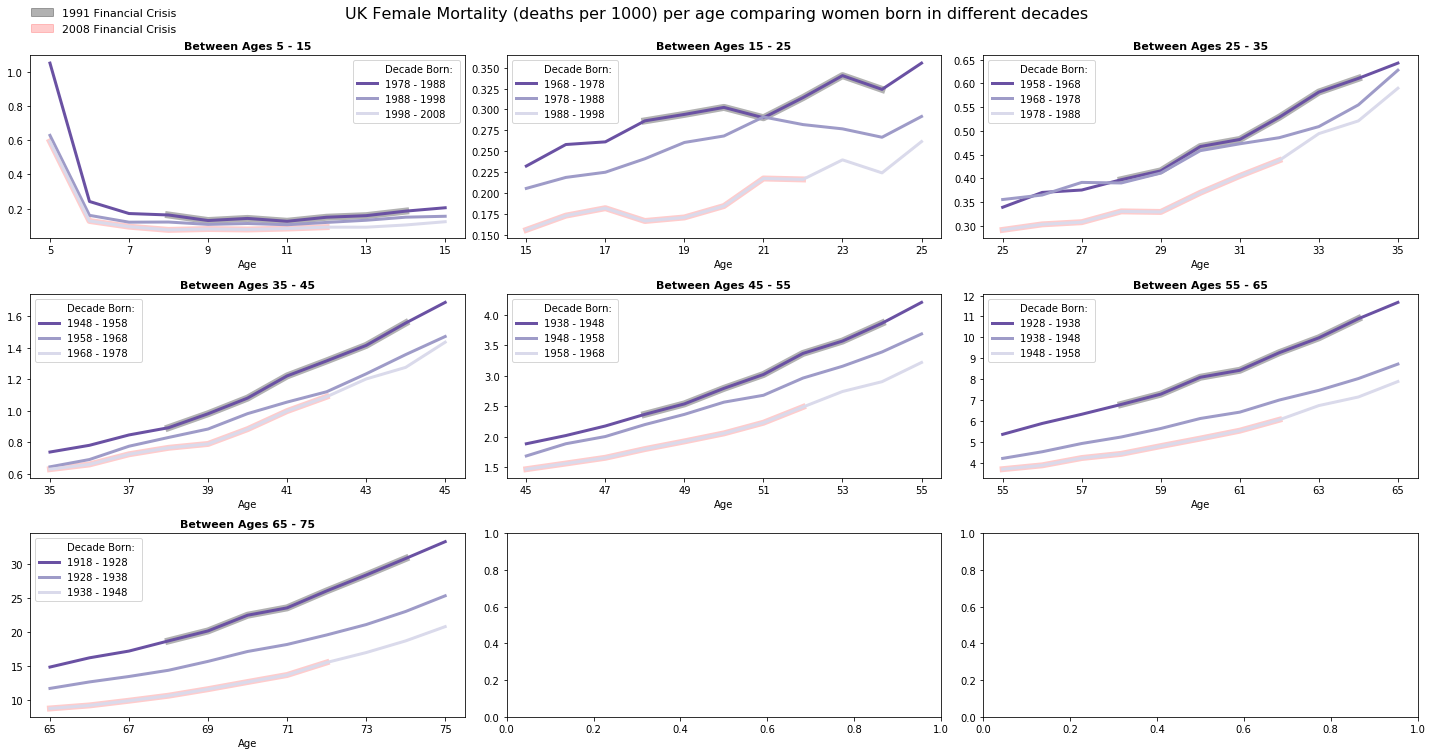

In [72]:
plot_same_age_range(female_pop_grouped_by_birth, birth_groups, 'UK Female Mortality (deaths per 1000) per age comparing women born in different decades', 'UK Female Mortality per age.pdf')